# Problem statement 

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# LIBRARIES IMPORT 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET 

In [2]:
dataset = pd.read_csv('dataset/S&P500_Stock_Data.csv')

In [3]:
dataset.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [4]:
dataset.tail(10)

,Interest Rates,Employment,S&P 500 Price
990,2.018200,56.929616,2206.946180
991,1.936748,52.967524,2086.159182
992,2.591529,57.281030,2686.211789
993,1.740441,55.098645,1922.893274
994,1.868835,60.543377,2065.424594
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [5]:
dataset.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# VISUALIZE DATASET

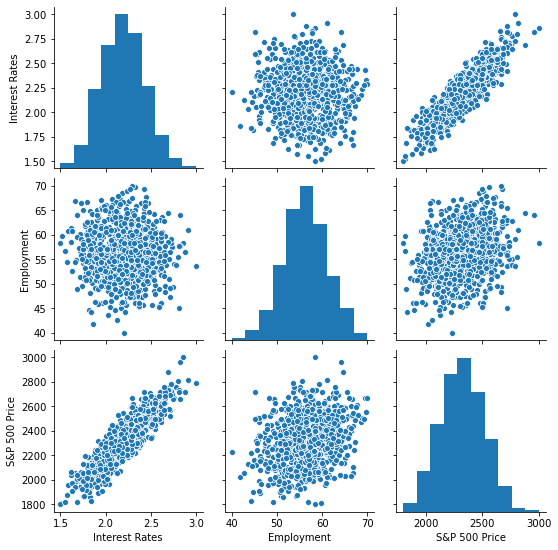

In [7]:
sns.pairplot(dataset)

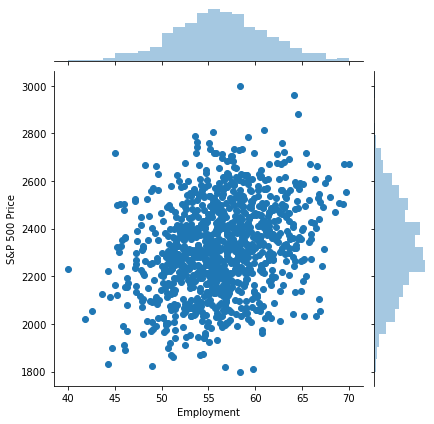

In [8]:
sns.jointplot(x = 'Employment', y = 'S&P 500 Price', data = dataset)

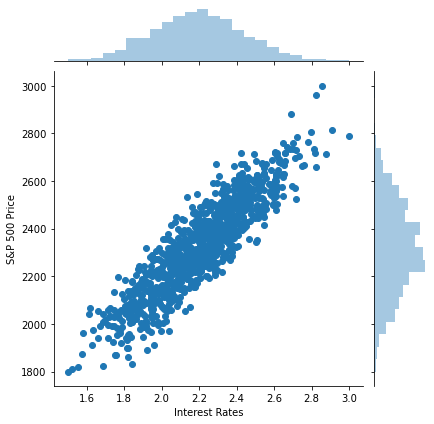

In [9]:
sns.jointplot(x = 'Interest Rates', y = 'S&P 500 Price', data = dataset)

# CREATE TESTING AND TRAINING DATASET

In [10]:
X = dataset[['Interest Rates', 'Employment']]
y = dataset['S&P 500 Price']

print(X)
print(y)

     Interest Rates  Employment
0          1.943859   55.413571
1          2.258229   59.546305
2          2.215863   57.414687
3          1.977960   49.908353
4          2.437723   52.035492
..              ...         ...
995        2.528420   52.390828
996        2.643571   54.626204
997        2.009644   57.004357
998        2.201656   62.447790
999        2.180638   46.297034

[1000 rows x 2 columns]
0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train, y_train)
print(X_test, y_test)

     Interest Rates  Employment
105        2.264448   52.898780
68         2.294610   50.273559
479        2.194332   56.176560
399        1.875154   56.968347
434        2.529669   51.402859
..              ...         ...
835        2.329282   55.918813
192        2.166832   53.236904
629        2.289741   70.000000
559        1.855734   58.263605
684        2.072650   55.170324

[700 rows x 2 columns] 105    2380.175799
68     2226.020117
479    2357.123376
399    2131.643743
434    2469.492940
          ...     
835    2377.056500
192    2255.418313
629    2669.413724
559    2094.558090
684    2170.149260
Name: S&P 500 Price, Length: 700, dtype: float64
     Interest Rates  Employment
993        1.740441   55.098645
859        1.950560   54.180055
298        2.377631   54.276367
553        2.351097   51.294848
672        2.307061   55.819913
..              ...         ...
167        1.877022   59.446336
998        2.201656   62.447790
984        1.990452   52.511023
491        1.5

# TRAINING THE MODEL 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Linear Model Coefficient (m):', model.coef_)
print('Linear Model Coefficient (b):', model.intercept_)

Linear Model Coefficient (m): [728.93825903  12.03081199]
Linear Model Coefficient (b): 42.985738505779864


# EVALUATING THE MODEL

In [16]:
y_pred = model.predict(X_test)

print(y_pred)

[1974.54155458 2116.65361141 2429.12088876 2373.90906858 2396.24973705
 2271.38584736 2610.93760641 2552.4186362  2448.06763978 1978.95337756
 2521.57560201 2470.46026588 2417.95439774 2411.31231514 2277.07775181
 2038.38884296 2412.57910586 2315.8038236  2584.3701498  2329.22325682
 2471.3587556  2080.72972811 2358.93221976 2129.34681288 2409.0818869
 2339.48500431 2216.18422696 2346.33293274 2317.85191777 2405.48561517
 2663.19324542 2523.94331096 2301.17652368 2462.99128772 2427.7087551
 2370.25714143 2432.78035347 2145.04375615 2429.62328538 2210.69599162
 2189.73086316 2627.18315898 2369.27006376 2286.75669752 2485.99854425
 2488.18260709 2113.02399862 2503.490705   2119.14023983 2419.5699002
 2100.22706931 2475.69913204 2144.74033373 1997.73624446 2485.41541211
 2449.9698932  2076.19858302 2113.54837966 2637.90446405 1912.53803109
 2594.63792282 2344.73028584 2335.58039547 2423.74913533 2486.45836338
 2230.05228694 2151.56828663 2254.85157328 2510.81462696 2267.18970983
 2317.178

Text(0.5, 1.0, 'Multiple Linear Regression predictions')

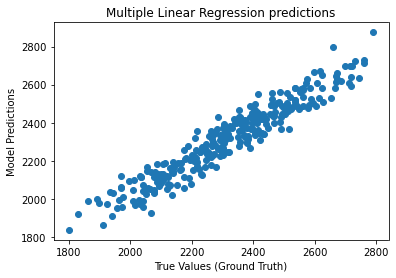

In [17]:
plt.scatter(y_test, y_pred)
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression predictions')

In [18]:
k = X_test.shape[1]
n = len(X_test)

print('k =', k, '\nn =', n)

k = 2 
n = 300


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [20]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_pred)/y_test ) )*100

print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('MAPE =', MAPE)

RMSE = 60.915
MSE = 3710.6499999618654
MAE = 49.98728977214386
R2 = 0.9104700739549397
adj_r2 = 0.9098671788300572
MAPE = 2.179329702721322


20% Testing data, 80% Training data

- RMSE = 62.032
- MSE = 3847.984681412707
- MAE = 51.21216398483923
- R2 = 0.8924043223043406
- adj_r2 = 0.891311980398801
- MAPE = 2.23886003422435

# VISUALIZE THE RESULTS 

In [21]:
from mpl_toolkits.mplot3d import Axes3D
#X = dataset[['Interest Rates', 'Employment']]
#y = dataset['S&P 500 Price']

In [22]:
x_surf, y_surf = np.meshgrid(
    np.linspace(
        dataset['Interest Rates'].min(),
        dataset['Interest Rates'].max(),
        100
    ),
    np.linspace(
        dataset['Employment'].min(),
        dataset['Employment'].max(),
        100
    )
)

print(x_surf.shape)
print(y_surf.shape)

(100, 100)
(100, 100)


In [23]:
only_X = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

only_X.shape

(10000, 2)

In [24]:
fitted_y = model.predict(only_X)

print(fitted_y.shape)

(10000,)


In [25]:
fitted_y = fitted_y.reshape(x_surf.shape)

print(fitted_y.shape)

(100, 100)


Text(0.5, 0, 'Stock Index Price')

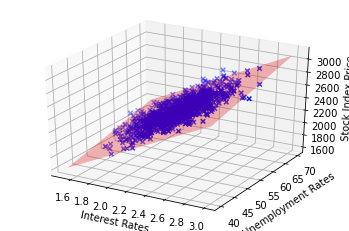

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    dataset['Interest Rates'],
    dataset['Employment'],
    dataset['S&P 500 Price'],
    marker = 'x',
    color = 'blue'
)
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')

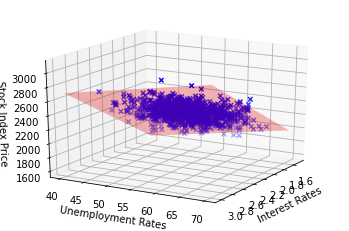

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    dataset['Interest Rates'],
    dataset['Employment'],
    dataset['S&P 500 Price'],
    marker = 'x',
    color = 'blue'
)
ax.plot_surface(x_surf, y_surf, fitted_y, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(20, 30)
plt.show()

In [28]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

print(coeff_df)

                Coefficient
Interest Rates   728.938259
Employment        12.030812
